## BUSINESS PROBLEM


There are several important factors to consider in making the decision on where to locate a restaurant business, having in mind that location can affect cost and profit, and also taking note of the fact that profit maximization is the primary goal of most businesses.
It is important to undertake a surrounding business and competitor analysis in determining the location of the business. Are businesses in the area doing well? Are people and businesses in the area affluent? What is the average income of people in the area? What types of restaurants are in the area? If, for example, there are already six barbeque restaurants in the neighborhood, it may not make business sense to establish another in the neighborhood.
If there is a night club in the neighborhood it might be expedient to situate a restaurant that caters for after hour crowd after they are done with night drinking and clubbing.
Visibility and accessibility are also vital considerations; one would want not a location in a side street with very little foot traffic and one would prefer a location accessible to car traffic, parking space should, for instance be available.
What about the cost   of the space? Is it affordable? Will it sustain or consume profit? Is there enough space to accommodate your vision?
What is the crime rate in the neighborhood? You would not want crime to chase away your customers. What is the population density of the neighborhood?. What are the demographics in terms of age, gender, employment, unemployment, underemployment, income bracket? How accessible are the sources of food supply?
These questions and considerations are within the purview of location data to answer. This is precisely what this project is about., using data to analyze, provide insight and provide solution. 

THE AUDIENCE
This project is for investors who are looking for prospects to invest in. The information here, though targeted at restaurant business are also useful for other businesses.

Startups would find this information also invaluable.

Data scientist, particularly beginners will gain insights into real world application of data science.



### Import Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import requests
import pandas as pd
from bs4 import BeautifulSoup as bs
import csv

### Read Austin Neighborhood Dataset

In [2]:
df = pd.read_excel("Neighborhood.xlsx")
df.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,"Population and Housing, Table I",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,by Neighborhood Reporting Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Census 2010 Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Map of Neighborhood Reporting Areas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,http://www.austintexas.gov/sites/default/files...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Percent,NaN,Gross,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Owner,NaN,Population,NaN,NaN


## Data Wrangling

### Drop Unnecessary rows

In [3]:
df.drop(df.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]], inplace=True)
df


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
16,NaN,ALLENDALE,29.6855,-95.2132,6643,0.831703,0.0189673,0.10974,0.0189673,0.0206232,NaN,3612,3263,349,0.641128,NaN,5.09635,60,1303.48
17,NaN,ANDERSON MILL,30.4558,-97.8071,28473,0.647455,0.0332947,0.131107,0.163277,0.0248657,NaN,11507,10904,603,0.672872,NaN,4.98966,62,5706.4
18,NaN,AVERY RANCH--LAKELINE,30.4901,-97.8249,14785,0.58485,0.0395671,0.140615,0.206628,0.0283395,NaN,6108,5681,427,0.605351,NaN,3.18547,74,4641.39
19,NaN,BARTON CREEK MALL,30.2577,-97.8094,5147,0.793472,0.00816009,0.0922868,0.0866524,0.0194288,NaN,2195,2076,119,0.637283,NaN,2.22036,84,2318.09
20,NaN,BARTON HILLS,30.2532,-97.8207,8022,0.78372,0.0138369,0.135627,0.0433807,0.0234356,NaN,4965,4614,351,0.313827,NaN,3.93603,70,2038.1
21,NaN,BERGSTROM,30.1975,-97.6685,179,0.513966,0.273743,0.212291,0,0,NaN,2,0,2,na,NaN,0.0377255,101,4744.8
22,NaN,BLUFF SPRINGS,30.1726,-97.7708,23000,0.175696,0.0798696,0.71587,0.0106957,0.0178696,NaN,7947,7362,585,0.53586,NaN,2.72776,81,8431.82
23,NaN,BOULDIN,30.1726,-97.7708,5510,0.585118,0.0526316,0.327586,0.0137931,0.0208711,NaN,2949,2694,255,0.404232,NaN,7.12575,38,773.252
24,NaN,BRENTWOOD,30.3295,-97.7481,7513,0.731798,0.0270198,0.177026,0.0397977,0.0243578,NaN,4401,4127,274,0.402956,NaN,7.41134,32,1013.72
25,NaN,BRODIE LANE,30.1902,-97.8477,10913,0.619353,0.0428846,0.272519,0.0401356,0.0251077,NaN,4939,4770,169,0.584067,NaN,5.68311,52,1920.25


### Drop Unnecessary Columns  and RenameColumns

In [4]:
df.columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']

In [5]:
df.drop(['1','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19'],axis=1,inplace=True)

In [6]:
df.rename({'2':'Neighborhood', '3':'latitude','4':'longitude'},axis=1, inplace=True)


In [13]:
df.head(2)

,Neighborhood,latitude,longitude
0,ALLENDALE,29.6855,-95.2132
1,ANDERSON MILL,30.4558,-97.8071


### Instantiate   Nominatim object to retrieve geographic coordinates for Austin.


In [15]:
address = 'Austin, TX, USA'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Austin, TX, USA are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Austin, TX, USA are 30.2711286, -97.7436995.


In [16]:
df

,Neighborhood,latitude,longitude
0,ALLENDALE,29.6855,-95.2132
1,ANDERSON MILL,30.4558,-97.8071
2,AVERY RANCH--LAKELINE,30.4901,-97.8249
3,BARTON CREEK MALL,30.2577,-97.8094
4,BARTON HILLS,30.2532,-97.8207
5,BERGSTROM,30.1975,-97.6685
6,BLUFF SPRINGS,30.1726,-97.7708
7,BOULDIN,30.1726,-97.7708
8,BRENTWOOD,30.3295,-97.7481
9,BRODIE LANE,30.1902,-97.8477


### Reset Dataframe Index

In [17]:
df.reset_index(drop=True,inplace=True)
df.head()

,Neighborhood,latitude,longitude
0,ALLENDALE,29.6855,-95.2132
1,ANDERSON MILL,30.4558,-97.8071
2,AVERY RANCH--LAKELINE,30.4901,-97.8249
3,BARTON CREEK MALL,30.2577,-97.8094
4,BARTON HILLS,30.2532,-97.8207


### Use Folium To Plot OpenStreetMap of Austin Texas

In [18]:
# create map of Austin using latitude and longitude values
map_Austin = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng,neighborhood in zip(df['latitude'], df['longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Austin) 
map_Austin

### Define Foursquare Credentials and Version

In [19]:
CLIENT_ID = 'VBJPYWPEDT22RBIYM3SE2H5U35MAUUSOGWISXAYQZGW2CM5Y' # your Foursquare ID
CLIENT_SECRET = 'LV2QBBU1FFEWWLYBJ2QSKQ3ZSLJLMU235EKAF4PWYC0UC3JD' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VBJPYWPEDT22RBIYM3SE2H5U35MAUUSOGWISXAYQZGW2CM5Y
CLIENT_SECRET:LV2QBBU1FFEWWLYBJ2QSKQ3ZSLJLMU235EKAF4PWYC0UC3JD


### Get the coordinates of the first neighborhood

In [20]:
df.loc[0, 'Neighborhood'] 

'ALLENDALE'

In [21]:
neighborhood_latitude = df.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude =df.loc[0, 'longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of ALLENDALE are 29.6855298, -95.2132181.


### Query the Foursquare API for venues

In [22]:
LIMIT = 100  


radius = 500  

 
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url  
 

'https://api.foursquare.com/v2/venues/explore?&client_id=VBJPYWPEDT22RBIYM3SE2H5U35MAUUSOGWISXAYQZGW2CM5Y&client_secret=LV2QBBU1FFEWWLYBJ2QSKQ3ZSLJLMU235EKAF4PWYC0UC3JD&v=20180605&ll=29.6855298,-95.2132181&radius=500&limit=100'

### Examine the result of the query

In [23]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f04dc0a1dc55400f95ea504'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Downtown Pasadena',
  'headerFullLocation': 'Downtown Pasadena, Pasadena',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 3,
  'suggestedBounds': {'ne': {'lat': 29.690029804500007,
    'lng': -95.20804794947303},
   'sw': {'lat': 29.681029795499995, 'lng': -95.21838825052698}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e14675a52b1695f992e9f27',
       'name': 'Shell',
       'location': {'address': '1700 Shaver St',
        'crossStreet': 'Southmore/Richey',
        'lat': 29.686708450317383,
        'lng': -95.

### Extract the category of the venue

In [24]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Process the response from JSON into Pandas dataframe

In [25]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Shell,Gas Station,29.686708,-95.209602
1,The Cuban Spot,Food Truck,29.686374,-95.215741
2,JR Foundation Repair,Construction & Landscaping,29.682518,-95.212793


In [26]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

3 venues were returned by Foursquare.


# Explore All Neighborhoods in Austin Texas

### Create a Function to repeat the above function in all neighborhoods

In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [31]:
Austin_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['latitude'],
                                   longitudes=df['longitude']
                                  )


ALLENDALE
ANDERSON MILL
AVERY RANCH--LAKELINE
BARTON CREEK MALL
BARTON HILLS
BERGSTROM
BLUFF SPRINGS
BOULDIN
BRENTWOOD
BRODIE LANE
BULL CREEK
CENTRAL EAST AUSTIN
CENTRAL WEST AUSTIN
CHERRY CREEK
CHESTNUT
CIRCLE C SOUTH
CORONADO HILLS
CRESTVIEW
DAVENPORT--LAKE AUSTIN
DAWSON
DECKER LAKE
DEL VALLE
DEL VALLE EAST
DITTMAR--SLAUGHTER
DOWNTOWN
EAST CESAR CHAVEZ
EAST CONGRESS
EAST OAK HILL
FOUR POINTS
FRANKLIN PARK
GALINDO
GARRISON PARK
GATEWAY
GEORGIA ACRES
GOVALLE
GRACY WOODS
HANCOCK
HARRIS BRANCH
HAYS WARTHA
HERITAGE HILLS
HIGHLAND
HIGHLAND PARK
HOLLY
HYDE PARK
JESTER
JOHNSTON TERRACE
JOLLYVILLE
LBJ
MANSFIELD--RIVER PLACE
MCKINNEY
MCNIEL
MLK
MLK-183
MONTOPOLIS
MUELLER
NACA
NORTH BURNET
NORTH LAMAR
NORTH LOOP
NORTH SHOAL CREEK
NORTH UNIVERSITY
NORTHWEST HILLS
OLD ENFIELD
OLD WEST AUSTIN
ONION CREEK
PARKER LANE
OLD WEST AUSTIN
PLEASANT VALLEY
POND SPRINGS
RIVERSIDE
ROBINSON RANCH
ROGERS HILL
ROSEDALE
ROSEWOOD
SAMSUNG--PIONEER CROSSING
SLAUGHTER CREEK
SOUTH BRODIE
SOUTH LAMAR
SOUTH MANCHACA
SO

In [22]:
print(Austin_venues.shape)
Austin_venues.head()
 

(1290, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ALLENDALE,29.685530,-95.213218,Shell,29.686708,-95.209602,Gas Station
1,ALLENDALE,29.685530,-95.213218,The Cuban Spot,29.686374,-95.215741,Food Truck
2,ALLENDALE,29.685530,-95.213218,JR Foundation Repair,29.682518,-95.212793,Construction & Landscaping
3,ANDERSON MILL,30.455835,-97.807096,Harper Park (in Anderson Mill),30.457869,-97.811024,Park
4,ANDERSON MILL,30.455835,-97.807096,Taqueria Benitez,30.455814,-97.804982,Food Truck


### Check how many venues were returned for each neighborhood

### Check the size of the resulting dataframe

In [32]:
Austin_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ALLENDALE,3,3,3,3,3,3
ANDERSON MILL,5,5,5,5,5,5
AVERY RANCH--LAKELINE,1,1,1,1,1,1
BARTON CREEK MALL,71,71,71,71,71,71
BARTON HILLS,3,3,3,3,3,3
BERGSTROM,1,1,1,1,1,1
BLUFF SPRINGS,5,5,5,5,5,5
BOULDIN,5,5,5,5,5,5
BRENTWOOD,3,3,3,3,3,3


### Find out how many unique categories can be curated from all the returned venues

In [33]:
print('There are {} uniques categories.'.format(len(Austin_venues['Venue Category'].unique())))

There are 233 uniques categories.


 # Create a Data-Frame of Restaurants Only

In [34]:

Austin_restaurants = Austin_venues[Austin_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Austin_restaurants.index = np.arange(1, len(Austin_restaurants )+1)

In [35]:
print (Austin_restaurants['Venue Category'].value_counts())

Mexican Restaurant               65
American Restaurant              16
Fast Food Restaurant             15
Thai Restaurant                  11
Seafood Restaurant                9
Sushi Restaurant                  9
Vietnamese Restaurant             8
Chinese Restaurant                8
Italian Restaurant                7
Tex-Mex Restaurant                6
Restaurant                        6
New American Restaurant           6
Korean Restaurant                 5
Mediterranean Restaurant          5
Japanese Restaurant               4
Vegetarian / Vegan Restaurant     4
Middle Eastern Restaurant         4
Indian Restaurant                 3
Asian Restaurant                  3
Cajun / Creole Restaurant         2
Halal Restaurant                  2
Latin American Restaurant         2
Greek Restaurant                  1
Turkish Restaurant                1
French Restaurant                 1
Indian Chinese Restaurant         1
Filipino Restaurant               1
Cuban Restaurant            

## Categorize Restaurants by Type

In [36]:
print('There are {} unique categories.'.format(len(Austin_restaurants['Venue Category'].unique())))

There are 30 unique categories.


###  Create a dataframe of top 10 categories

In [37]:
Austin_Top_10_Restaurants = Austin_restaurants['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Austin_Top_10_Restaurants = Austin_Top_10_Restaurants.reset_index()
Austin_Top_10_Restaurants.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Austin_Top_10_Restaurants

,Venue_Category,Frequency
0,Mexican Restaurant,65
1,American Restaurant,16
2,Fast Food Restaurant,15
3,Thai Restaurant,11
4,Seafood Restaurant,9
5,Sushi Restaurant,9
6,Vietnamese Restaurant,8
7,Chinese Restaurant,8
8,Italian Restaurant,7
9,Tex-Mex Restaurant,6


## Visualize the Top Ten Categories of Restaurants in the Neighborhoods

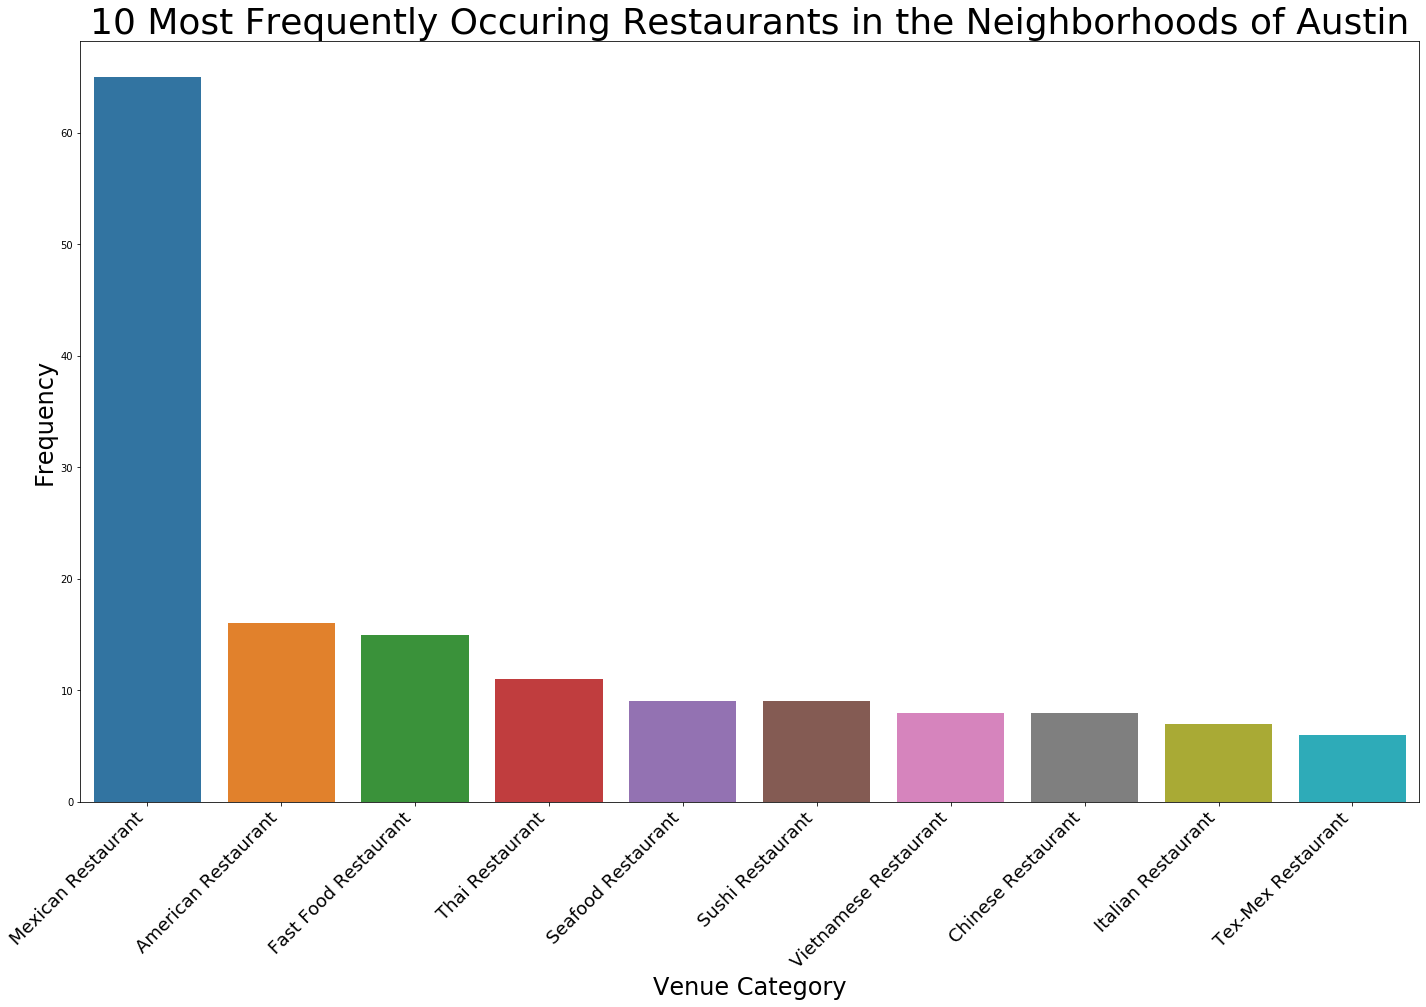

In [39]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Austin_Top_10_Restaurants)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Restaurants in the Neighborhoods of Austin', fontsize= 36)
plt.xlabel("Venue Category", fontsize=24)
plt.ylabel ("Frequency", fontsize=24)
plt.xticks(fontsize=18)
plt.savefig("Most_Freq_Restaurants.png", dpi=300)
plt.rcParams["figure.figsize"] = [24,14]
 
plt.show()

## One Hot Coding

In [40]:
# one hot encoding
Austin_onehot = pd.get_dummies(Austin_restaurants[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Austin_onehot['Neighborhood'] = Austin_restaurants['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Austin_onehot.columns[-1]] + list(Austin_onehot.columns[:-1])
Austin_onehot = Austin_onehot[fixed_columns]

Austin_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Indian Chinese Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,BARTON CREEK MALL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,BARTON CREEK MALL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,BARTON CREEK MALL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,BARTON CREEK MALL,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,BARTON CREEK MALL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [41]:
# New dataframe size.
Austin_onehot.shape

(208, 31)

### Grouping by neighbourhoods and showing the mean of the frequency of occurrence for each category of restaurants.

In [42]:
Austin_grouped = Austin_onehot.groupby('Neighborhood').mean().reset_index()
Austin_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Indian Chinese Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,BARTON CREEK MALL,0.200000,0.000000,0.0,0.200000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.00,0.000000,0.000000,0.200000,0.000000,0.200000,0.000000,0.000000,0.000000
1,CENTRAL EAST AUSTIN,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.100000,0.100000,0.20,0.100000,0.100000,0.100000,0.000000,0.100000,0.000000,0.000000,0.000000
2,CORONADO HILLS,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.00,0.000000,0.250000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000
3,DAVENPORT--LAKE AUSTIN,0.250000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.00,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,DOWNTOWN,0.142857,0.000000,0.0,0.142857,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.142857,0.000000,0.00,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.142857,0.000000
5,EAST CESAR CHAVEZ,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,EAST CONGRESS,0.000000,0.000000,0.0,0.250000,0.000000,0.250000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,FOUR POINTS,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.00,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,FRANKLIN PARK,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.00,0.000000,0.000000,0.166667,0.333333,0.000000,0.000000,0.000000,0.000000
9,GALINDO,0.000000,0.000000,0.0,0.000000,0.000000,0.250000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [43]:
Austin_grouped.shape

(55, 31)

## Top Ten Most Common Restaurants Per Neighborhood

In [44]:
num_top_venues = 10

for hood in Austin_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Austin_grouped[Austin_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----BARTON CREEK MALL----
                           venue  freq
0            American Restaurant   0.2
1             Chinese Restaurant   0.2
2                Thai Restaurant   0.2
3               Sushi Restaurant   0.2
4             Mexican Restaurant   0.2
5              Korean Restaurant   0.0
6  Vegetarian / Vegan Restaurant   0.0
7             Turkish Restaurant   0.0
8             Tex-Mex Restaurant   0.0
9             Seafood Restaurant   0.0


----CENTRAL EAST AUSTIN----
                       venue  freq
0    New American Restaurant   0.2
1            Thai Restaurant   0.1
2           Sushi Restaurant   0.1
3         Seafood Restaurant   0.1
4                 Restaurant   0.1
5  Middle Eastern Restaurant   0.1
6         Mexican Restaurant   0.1
7  Latin American Restaurant   0.1
8         Italian Restaurant   0.1
9        American Restaurant   0.0


----CORONADO HILLS----
                           venue  freq
0             Tex-Mex Restaurant  0.25
1               Sushi Resta

## Create a pandas dataframe of the Top Ten Most Common Restaurants Per Neighborhood

In [45]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [46]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Austin_grouped['Neighborhood']

for ind in np.arange(Austin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Austin_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(30)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,BARTON CREEK MALL,American Restaurant,Thai Restaurant,Sushi Restaurant,Chinese Restaurant,Mexican Restaurant,Indian Chinese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Cuban Restaurant,Fast Food Restaurant
1,CENTRAL EAST AUSTIN,New American Restaurant,Italian Restaurant,Seafood Restaurant,Latin American Restaurant,Mexican Restaurant,Restaurant,Middle Eastern Restaurant,Sushi Restaurant,Thai Restaurant,Cajun / Creole Restaurant
2,CORONADO HILLS,Mexican Restaurant,Tex-Mex Restaurant,Sushi Restaurant,Seafood Restaurant,Vietnamese Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant,Filipino Restaurant
3,DAVENPORT--LAKE AUSTIN,Italian Restaurant,Restaurant,Mexican Restaurant,American Restaurant,Tex-Mex Restaurant,Sushi Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant
4,DOWNTOWN,American Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Sushi Restaurant,Seafood Restaurant,Latin American Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant
5,EAST CESAR CHAVEZ,Mexican Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant
6,EAST CONGRESS,Mexican Restaurant,Chinese Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Cuban Restaurant,Filipino Restaurant,French Restaurant
7,FOUR POINTS,Seafood Restaurant,Mexican Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant,Filipino Restaurant
8,FRANKLIN PARK,Mexican Restaurant,Tex-Mex Restaurant,Sushi Restaurant,Vietnamese Restaurant,Indian Chinese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant
9,GALINDO,Italian Restaurant,Seafood Restaurant,Fast Food Restaurant,New American Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Filipino Restaurant


# Cluster Neighborhoods



### At this juncture, clustering process will be used to identify relationships in our data and to segment the restaurants based on the relationships. Amongst the various clustering algorithms available, we shall use the K means algorithm.

In [47]:
# set number of clusters (I choose 5)
kclusters = 5

Austin_grouped_clustering = Austin_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Austin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 4, 4, 4, 4, 0, 4, 0, 4, 2])

In [48]:
Austin_merged = df
Austin_merged.head(10)

,Neighborhood,latitude,longitude
0,ALLENDALE,29.6855,-95.2132
1,ANDERSON MILL,30.4558,-97.8071
2,AVERY RANCH--LAKELINE,30.4901,-97.8249
3,BARTON CREEK MALL,30.2577,-97.8094
4,BARTON HILLS,30.2532,-97.8207
5,BERGSTROM,30.1975,-97.6685
6,BLUFF SPRINGS,30.1726,-97.7708
7,BOULDIN,30.1726,-97.7708
8,BRENTWOOD,30.3295,-97.7481
9,BRODIE LANE,30.1902,-97.8477


In [49]:
neighborhoods_venues_with_clusters_labels = neighborhoods_venues_sorted

In [50]:
neighborhoods_venues_with_clusters_labels

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,BARTON CREEK MALL,American Restaurant,Thai Restaurant,Sushi Restaurant,Chinese Restaurant,Mexican Restaurant,Indian Chinese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Cuban Restaurant,Fast Food Restaurant
1,CENTRAL EAST AUSTIN,New American Restaurant,Italian Restaurant,Seafood Restaurant,Latin American Restaurant,Mexican Restaurant,Restaurant,Middle Eastern Restaurant,Sushi Restaurant,Thai Restaurant,Cajun / Creole Restaurant
2,CORONADO HILLS,Mexican Restaurant,Tex-Mex Restaurant,Sushi Restaurant,Seafood Restaurant,Vietnamese Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant,Filipino Restaurant
3,DAVENPORT--LAKE AUSTIN,Italian Restaurant,Restaurant,Mexican Restaurant,American Restaurant,Tex-Mex Restaurant,Sushi Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant
4,DOWNTOWN,American Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Sushi Restaurant,Seafood Restaurant,Latin American Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant
5,EAST CESAR CHAVEZ,Mexican Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant
6,EAST CONGRESS,Mexican Restaurant,Chinese Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Cuban Restaurant,Filipino Restaurant,French Restaurant
7,FOUR POINTS,Seafood Restaurant,Mexican Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant,Filipino Restaurant
8,FRANKLIN PARK,Mexican Restaurant,Tex-Mex Restaurant,Sushi Restaurant,Vietnamese Restaurant,Indian Chinese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant
9,GALINDO,Italian Restaurant,Seafood Restaurant,Fast Food Restaurant,New American Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Filipino Restaurant


In [51]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Austin_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Austin_merged = Austin_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')



In [54]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Austin_merged['latitude'],Austin_merged['longitude'],Austin_merged['Neighborhood'], Austin_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

## Cluster 1

In [53]:
Austin_merged.loc[Austin_merged['Cluster Labels']==0]

,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,EAST CESAR CHAVEZ,30.2567,-97.7473,0.0,Mexican Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant
28,FOUR POINTS,30.4038,-97.8711,0.0,Seafood Restaurant,Mexican Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant,Filipino Restaurant
32,GATEWAY,30.39,-97.7573,0.0,Seafood Restaurant,Mexican Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant,Filipino Restaurant
33,GEORGIA ACRES,30.3513,-97.7178,0.0,Mexican Restaurant,Korean Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant,Filipino Restaurant
40,HIGHLAND,30.3341,-97.7328,0.0,Mexican Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant
43,HYDE PARK,30.3073,-97.7445,0.0,Mexican Restaurant,American Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant
45,JOHNSTON TERRACE,30.2569,-97.7012,0.0,Mexican Restaurant,American Restaurant,French Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant,Filipino Restaurant
57,NORTH LAMAR,30.3703,-97.7043,0.0,Mexican Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant
69,RIVERSIDE,30.2385,-97.745,0.0,Mexican Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant,Filipino Restaurant
77,SOUTH LAMAR,30.2381,-97.8002,0.0,Mexican Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant


## Cluster 2

In [56]:
Austin_merged.loc[Austin_merged['Cluster Labels']==1]

,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
65,PARKER LANE,30.2231,-97.7487,1.0,American Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Gluten-free Restaurant
71,ROGERS HILL,30.2814,-97.7137,1.0,Italian Restaurant,American Restaurant,Turkish Restaurant,Thai Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant,Filipino Restaurant
72,ROSEDALE,30.3157,-97.7609,1.0,American Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Gluten-free Restaurant
88,UPPER BOGGY CREEK,30.1859,-97.7728,1.0,American Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Gluten-free Restaurant


## Cluster 3

In [57]:
Austin_merged.loc[Austin_merged['Cluster Labels']==2]

,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,GALINDO,30.2363,-97.7856,2.0,Italian Restaurant,Seafood Restaurant,Fast Food Restaurant,New American Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Filipino Restaurant
35,GRACY WOODS,30.3936,-97.7107,2.0,Fast Food Restaurant,Sushi Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Filipino Restaurant
39,HERITAGE HILLS,30.3457,-97.7057,2.0,Seafood Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant
52,MLK-183,30.283,-97.7091,2.0,Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Filipino Restaurant,French Restaurant,Gluten-free Restaurant
54,MUELLER,30.2985,-97.7183,2.0,Fast Food Restaurant,Chinese Restaurant,Restaurant,Mexican Restaurant,Mediterranean Restaurant,Vietnamese Restaurant,Indian Chinese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Cuban Restaurant
89,UT,30.2849,-97.7362,2.0,Fast Food Restaurant,American Restaurant,New American Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Filipino Restaurant,French Restaurant


## Cluster 4

In [58]:
Austin_merged.loc[Austin_merged['Cluster Labels']==3]

,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
63,OLD WEST AUSTIN,30.2944,-97.771,3.0,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Gluten-free Restaurant
66,OLD WEST AUSTIN,30.2944,-97.771,3.0,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Gluten-free Restaurant
100,WINDSOR ROAD,30.2936,-97.7672,3.0,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Gluten-free Restaurant


## Cluster 5

In [59]:
Austin_merged.loc[Austin_merged['Cluster Labels']==4]

,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,BARTON CREEK MALL,30.2577,-97.8094,4.0,American Restaurant,Thai Restaurant,Sushi Restaurant,Chinese Restaurant,Mexican Restaurant,Indian Chinese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Cuban Restaurant,Fast Food Restaurant
11,CENTRAL EAST AUSTIN,30.2706,-97.7415,4.0,New American Restaurant,Italian Restaurant,Seafood Restaurant,Latin American Restaurant,Mexican Restaurant,Restaurant,Middle Eastern Restaurant,Sushi Restaurant,Thai Restaurant,Cajun / Creole Restaurant
16,CORONADO HILLS,30.3272,-97.702,4.0,Mexican Restaurant,Tex-Mex Restaurant,Sushi Restaurant,Seafood Restaurant,Vietnamese Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant,Filipino Restaurant
18,DAVENPORT--LAKE AUSTIN,30.3366,-97.8063,4.0,Italian Restaurant,Restaurant,Mexican Restaurant,American Restaurant,Tex-Mex Restaurant,Sushi Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant
24,DOWNTOWN,30.2728,-97.761,4.0,American Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Sushi Restaurant,Seafood Restaurant,Latin American Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant
26,EAST CONGRESS,30.2107,-97.781,4.0,Mexican Restaurant,Chinese Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Cuban Restaurant,Filipino Restaurant,French Restaurant
29,FRANKLIN PARK,30.1973,-97.7661,4.0,Mexican Restaurant,Tex-Mex Restaurant,Sushi Restaurant,Vietnamese Restaurant,Indian Chinese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant
31,GARRISON PARK,30.2096,-97.8359,4.0,Thai Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant
34,GOVALLE,30.2595,-97.7209,4.0,Mexican Restaurant,Fast Food Restaurant,Italian Restaurant,Indian Restaurant,Thai Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Filipino Restaurant
36,HANCOCK,30.2981,-97.7417,4.0,Thai Restaurant,Vietnamese Restaurant,New American Restaurant,Mexican Restaurant,Indian Chinese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Fast Food Restaurant


## Conclusion

In [ ]:
It is important to note that to make a very useful conclusion on this project, it is inportant to 